<a href="https://colab.research.google.com/github/tisRobin/Recommender_System/blob/main/Kpop_Song_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ratings = pd.read_csv('/content/gdrive/MyDrive/Group 3/Data/K-pop songs Dataset/Ratings.csv', encoding = 'utf-8')

ratings.head()

,participant_id,song_query,preference_5pt
0,participant_US1,Thunder,4
1,participant_US1,그녀의 사무실,1
2,participant_US1,사랑아,5
3,participant_US3,영원히,2
4,participant_US3,너를 그리다,3


The following step (the separation of the data into train and test sets) is conducted for the calculation of the **root mean squared error** later in the analysis, and 20% of the datast would be used as test data. X_train represents the copy of the ratings dataframe, which we used to create a pivot table representing the user-item matrix. In this case the users are the representatives of Korea, USA and Brazil, and items are the Korean pop songs the rated in accordance with the research paper.





However, initially attmepting to make a pivot table of user id - item matrix produced an error:

**ValueError: Index contains duplicate entries, cannot reshape**

It was later found out that there were some multiple points in the DataFrame that shared the same row-column pairs with the exact same values, due to the mistake of the researchers who performed reduncancy the data entry.

Therefore, instead of using **pivot**, we used **pivot_table** with the aggregate function of **'mean'**,  to make the id - query matrix without incurring the ValueError. 




In [ ]:
# Divide dataset into train and test, convert x_train into pivot table (user-item matrix)

from sklearn.model_selection import train_test_split
x = ratings.copy()
y = ratings['preference_5pt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
rating_matrix = x_train.pivot_table(index='participant_id', columns='song_query', values='preference_5pt', aggfunc='mean')

In [ ]:
ratings[(ratings['participant_id'] == 'participant_BR11') & (ratings['song_query'] == '커피한잔 (펄시스터즈)') ]

,participant_id,song_query,preference_5pt
2855,participant_BR11,커피한잔 (펄시스터즈),5
2929,participant_BR11,커피한잔 (펄시스터즈),5


In [ ]:
rating_matrix

song_query,..더라면,119 (feat. Gray),Adios (prod. Boycold),Apple Pie,Bad Girl Good Girl,Band,Beep,Break Up,Cafe,Cake Love (prod. By 검정치마),...,일하러 가야 돼,있잖아,잘가라,좋아한다 안 한다 (duet 세정 Of 구구단) (prod. 박경),처음 뵙겠습니다 (with 휘성),커플,커피한잔 (펄시스터즈),컬러링,하루 일과,한 여자
participant_id,,,,,,,,,,,,,,,,,,,,,
participant_BR1,NaN,NaN,5.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,...,5.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,4.0
participant_BR10,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
participant_BR11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,4.0,5.0,NaN,NaN,NaN,4.0,5.0,NaN,4.0,NaN
participant_BR12,NaN,NaN,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
participant_BR13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
participant_US54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
participant_US6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN
participant_US7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


This is the formula for the root mean squared error, which is the square root of the average of the squared deviations.

And we also defined the score, whicb evaluated the accuracy of the recommender system. 

'id_pairs' is the list of user_id - song pairs in the test set, 

y_pred is the array of predicted values according to a designated model. Of course, in this case, the recommender model.

y_true is the array of actual ratings values in the test set. We will return the root mean squared error after the comparing the values predicted by the recommender model and the true values. 

In [ ]:
# RMSE Formula 
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

# Accuracy 
def score(model, neighbor_size=0):
    id_pairs = zip(x_test['participant_id'], x_test['song_query'])
    y_pred = np.array([model(user, song, neighbor_size) for (user, song) in id_pairs])
    y_true = np.array(x_test['preference_5pt'])
    return RMSE(y_true, y_pred)

We compute the cosine similarity for all the user pairs and present them in matrix format. 

Notice that the matrix is diagonally symmetric 

In [ ]:
# Cosine similarity of all user pairs in the training data 

from sklearn.metrics.pairwise import cosine_similarity
matrix_dummy = rating_matrix.copy().fillna(0)
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [ ]:
user_similarity

participant_id,participant_BR1,participant_BR10,participant_BR11,participant_BR12,participant_BR13,participant_BR14,participant_BR15,participant_BR16,participant_BR17,participant_BR18,...,participant_US5,participant_US50,participant_US51,participant_US52,participant_US53,participant_US54,participant_US6,participant_US7,participant_US8,participant_US9
participant_id,,,,,,,,,,,,,,,,,,,,,
participant_BR1,1.000000,0.000000,0.319361,0.416791,0.000000,0.000000,0.181294,0.215852,0.153724,0.400229,...,0.585276,0.000000,0.000000,0.412742,0.000000,0.000000,0.319899,0.333351,0.000000,0.000000
participant_BR10,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.595844,0.000000,0.000000,0.877580,0.000000,0.000000,0.000000,0.485022
participant_BR11,0.319361,0.000000,1.000000,0.000000,0.000000,0.000000,0.401725,0.120706,0.279869,0.236856,...,0.140676,0.000000,0.000000,0.000000,0.278987,0.000000,0.385068,0.000000,0.000000,0.109841
participant_BR12,0.416791,0.000000,0.000000,1.000000,0.000000,0.000000,0.297487,0.000000,0.000000,0.483351,...,0.000000,0.000000,0.000000,0.780307,0.000000,0.000000,0.092903,0.000000,0.000000,0.000000
participant_BR13,0.000000,0.000000,0.000000,0.000000,1.000000,0.325214,0.158045,0.580877,0.508039,0.000000,...,0.121435,0.257938,0.000000,0.000000,0.000000,0.000000,0.000000,0.252012,0.461211,0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
participant_US54,0.000000,0.877580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.539128,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.479822
participant_US6,0.319899,0.000000,0.385068,0.092903,0.000000,0.000000,0.000000,0.000000,0.000000,0.039406,...,0.145628,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.262239
participant_US7,0.333351,0.000000,0.000000,0.000000,0.252012,0.621658,0.000000,0.507298,0.521275,0.000000,...,0.272498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.635523,0.218088


To calculate the predicted ratings, we need to know the deviation of the song ratings of all users. So we first derive the average ratings of all users.





In [ ]:
# Average ratings of all users 
rating_mean = rating_matrix.mean(axis=1)

# KNN + User Bias 

def ubcf_bias_knn(user_id, song_id, neighbor_size=0):
    # Average rating of user of interest
    user_mean = rating_mean[user_id]
    if song_id in rating_matrix:
        # Similarity between user of interest and other users 
        sim_scores = user_similarity[user_id]
        # Ratings for the song in question 
        song_ratings = rating_matrix[song_id]
        # Average ratings of all users 
        others_mean = rating_mean
        # Erase users who did not rate the song in question 
        none_rating_idx = song_ratings[song_ratings.isnull()].index  # Users who didn't rate 
        song_ratings = song_ratings.drop(none_rating_idx) # drop them from song ratings  
        sim_scores = sim_scores.drop(none_rating_idx)  # drop from similarity 
        others_mean = others_mean.drop(none_rating_idx) # drop from average ratings 

        if neighbor_size == 0:               # If neighbor size = 0 
            if len(song_ratings) >= 2:      # Only if at least 2 people rated the song 
                # Predicted deviation 
                song_ratings = song_ratings - others_mean  # deviation 
                prediction = np.dot(sim_scores, song_ratings) / sim_scores.sum()
                # Predicted rating 
                prediction = prediction + user_mean
            else:
                prediction = user_mean
        else:                                # If there is neighbor size 
            # smaller value between designated neighbor size and number of users who rated 
            neighbor_size = min(neighbor_size, len(sim_scores))
            # convert to array
            sim_scores = np.array(sim_scores)
            song_ratings = np.array(song_ratings)
            others_mean = np.array(others_mean)
            # Sort the similarity in order and get their indices 
            user_idx = np.argsort(sim_scores)
            # Similarity and Ratings by neighbor size 
            sim_scores = sim_scores[user_idx][-neighbor_size:]
            song_ratings = song_ratings[user_idx][-neighbor_size:]
            # Mean values of neighbor size 
            others_mean = others_mean[user_idx][-neighbor_size:]
            # Predicted ratings  
            if len(song_ratings) >= 2:      
                song_ratings = song_ratings - others_mean
                prediction = np.dot(sim_scores, song_ratings) / sim_scores.sum()
                
                prediction = prediction + user_mean
            else:
                prediction = user_mean
    else:
        prediction = user_mean
    return prediction

In [ ]:
sim_scores = user_similarity['participant_BR1']
sim_scores = np.array(sim_scores)
user_idx = np.argsort(sim_scores)
user_idx


array([ 82,  98,  97,  90,  83, 164,  78,  77,  72,  99,  71,  65,  64,
        61,  59,  56,  55,  54,  53,  70, 100, 101, 104, 161, 160, 158,
       157, 155, 153, 149, 147, 145, 141, 132, 130, 126, 119, 114, 110,
       109, 107, 105,  51,  46, 165,  10,  20,  16,  21,  23,  24,   5,
         4,  27,  29,  14,   1,  33,  34,  35,  18,  42,  37,  11,  41,
        39,  12, 117, 115, 127,  26, 108, 103, 123, 146, 142,  57, 116,
        79, 120, 111,  84,   8, 135,  62,  91,  48, 113,   6, 131,  49,
        28,  73,  85,  67, 139,  81,  80,  30,  15,   7,  58,  44,  87,
       122,  63, 154,  47,  19,  66,  36, 129,  13,  43, 121, 150,  40,
        76,   2, 162, 118, 163,  32,  25,  50, 152, 133,  17, 143,  68,
       102,  92, 144,  22,   9,  38,  60, 106, 159,   3, 112,  45, 134,
        94,  93,  95,  89, 140,  31, 124,  75,  86, 151, 128, 125,  88,
       137,  74,  52,  69, 136, 148, 156,  96, 138,   0])

In [ ]:
# Accuracy 
score(ubcf_bias_knn, 35)

0.8223833672051327

Text(0, 0.5, 'RMSE')

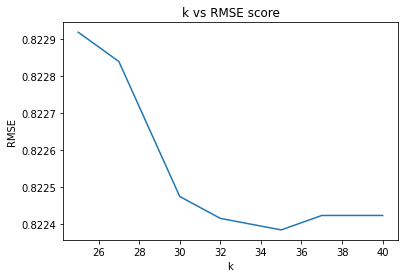

In [ ]:
k_list = []
RMSE_list = []
for k in (25, 27, 30, 32, 35, 37, 40):
  k_list.append(k)
  RMSE_list.append(score(ubcf_bias_knn, k))

plt.plot(k_list, RMSE_list)
plt.title('k vs RMSE score')
plt.xlabel('k')
plt.ylabel('RMSE')

In [ ]:
# User-item matrix for whole data 

rating_matrix = ratings.pivot_table(index='participant_id', columns='song_query', values='preference_5pt', aggfunc='mean')


# Cosine similarity for the whole data 
from sklearn.metrics.pairwise import cosine_similarity
matrix_dummy = rating_matrix.copy().fillna(0)
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [ ]:
# Recommender 
def recommender(user, n_items=10):
    predictions = []
    item_ids = []
    not_rated = rating_matrix.loc[user].isnull()                        # Unrated songs 
    for item in rating_matrix:
        if not_rated.loc[item]:                                         # Predicted ratings for unrated songs
            predictions.append(ubcf_bias_knn(user, item, 35))
            item_ids.append(item)
    predictions = np.array(predictions)                                 # Numpy array conversion 
    item_ids = np.array(item_ids)
    prediction_item = dict(zip(predictions,item_ids))                # dictionary mapping ratings to the song 
    recommendations = np.sort(predictions)[::-1][:n_items]           # choose the highest predicted ratings 
    recommend_item = []
    for rating in recommendations:
      recommend_item.append(prediction_item[rating])  # song names corresponding to the predictions 

    return recommend_item

In [ ]:
# Recommendation 
recommender('participant_BR11')

['밤하늘의 별을..',
 'Rumor',
 'Think About` Chu (prod. By 박근태)',
 '내 눈에만 보여',
 'Fingertips',
 'So Hot',
 '살자 (the Cure)',
 'Moya (모야)',
 'White Day',
 'I`m In Love']

In [ ]:
# Recommendation 
recommender('participant_US6')

['Rumor',
 '내 눈에만 보여',
 '잘가라',
 'Only U',
 '커플',
 '같은 꿈',
 '내 모습을',
 'White Day',
 '실례해도 될까요',
 'Fingertips']

In [ ]:
# without k-nearest neighbors and bias-from-mean

def coll_f(user_id, song_id, neighbors = 0):
    if song_id in rating_matrix:
        # cosine similarity of one user vs other users 
        sim_scores = user_similarity[user_id]
        # all ratings of a given song 
        song_ratings = rating_matrix[song_id]
        # list of users (user ids) that didn't make the rating  
        none_rating_idx = song_ratings[song_ratings.isnull()].index
        # remove those that aren't rated 
        song_ratings = song_ratings.dropna()
        # remove sim_scores that weren't rated 
        sim_scores = sim_scores.drop(none_rating_idx)
         
        if len(song_ratings) >= 2:      
            prediction = np.dot(sim_scores, song_ratings) / sim_scores.sum()   # weighted average 
        else:
            prediction = 3.0
    else:
        prediction = 3.0
    return prediction

In [ ]:
score(coll_f)

1.0482057211351157